### Libraries Used
* Pandas - Data Loading / Transformation / Analysis
* Matplotlib, Seaborn - Plotting / Visualization
* Sklearn - ML Algorithms / Preprocessing ( PCA, TfidF Vectorizer )

In [1]:
# Allow rendering of Matplotlib plots directly on Jupyter Notebooks.
%matplotlib inline

# Import all dependencies required for the problem.
from __future__ import print_function
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Beautify the traditional looking plots.
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Setup a random seed value, to obtain predictable results in experiments.
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

### Newsgroup Dataset
#### Categories Selected
* Sci Space
* Sci - Electronics
* Talk - Politics - Guns

In [3]:
categories = ['sci.space', 'sci.electronics', 'talk.politics.guns']

# Load the dataset for only the specific categories as it is very large otherwise.
twenty_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=42,
    categories=categories)

# Split the dataset into dependent features (data to help predict) and target features (prediction)
y = twenty_train['target']
x = twenty_train['data']

# Category names for the articles
y_names = [categories[z] for z in y]

In [4]:
# A means to convert all the text here into a CBOW (Continuous Bag of Words) and then run TfIdf upon the same.
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
text_processor = TfidfVectorizer(stop_words='english')
x_vect = text_processor.fit_transform(x).toarray()

In [10]:
# Perform Principal Component Analysis for Dimensionality Reduction
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
pca = PCA(n_components=2)
plot_x = pca.fit_transform(x_vect)

In [14]:
# Build a DataFrame with each article with the X, Y Coordinate to be plotted obtained from PCA.
p_x = [z[0] for z in plot_x]
p_y = [z[1] for z in plot_x]
plot_df = pd.DataFrame({'x': p_x, 'y': p_y, 'category': y_names})
plot_df.head()

,category,x,y
0,talk.politics.guns,-0.035896,-0.018883
1,talk.politics.guns,-0.029813,0.034919
2,sci.space,0.005602,-0.056311
3,talk.politics.guns,-0.020455,-0.004464
4,sci.space,0.001093,-0.011686


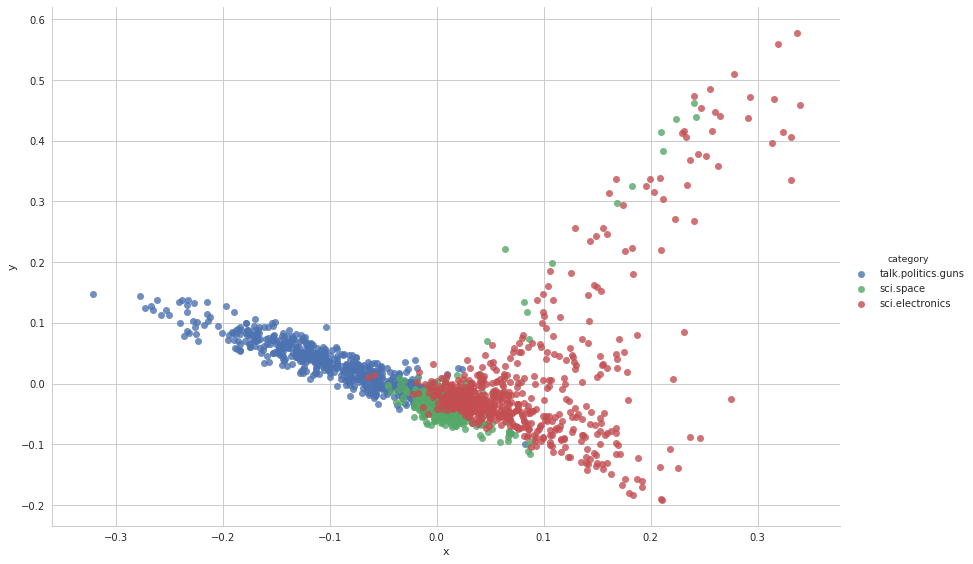

In [16]:
# Scatter Plot on the Coordinates with the color scheme obtained from the category
z=sns.lmplot(
    x="x", y="y",
    hue="category", fit_reg=False, data=plot_df, size=8, aspect=1.5)

### Things to experiment with after the above tutorial
* Try out with different categories for news articles
* Try out with 3D Scatterplot Visualization
* Try out different Dimensionality Reduction techniques (Tsne..)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

In [18]:
kmeans.fit(x_vect)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [19]:
result = []
id2label = {}
for index, label in enumerate(kmeans.labels_):
    id2label[label] = y_names[index]
    result.append((label, y_names[index]))

In [21]:
id2label[kmeans.predict(text_processor.transform([
    """the minister decided to go ahead with the strike, the people were troubled,
    and the police went about attacking terrorists"""
]))[0]]

'talk.politics.guns'